# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge #libreria de regularizacion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from dotenv import load_dotenv
from sqlalchemy import create_engine
import os
from funpymodeling.exploratory import freq_tbl
import seaborn as sns


In [2]:
#load the .env file variables
load_dotenv()
connection_string = os.getenv('DATABASE_URL')
#print(connection_string)

In [3]:
df_raw = pd.read_csv(connection_string)

In [4]:
df_raw.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S


In [5]:

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = df_raw.copy()

In [7]:

#Paso 2:

#Explore y limpie los datos.
# Transformo la data solo de embarque y de sexo que las necesito categoricas ya que pueden ser 
# importantes como explicativas

df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


In [9]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
df['Sex_encoded']=df['Sex'].apply(lambda x: 1 if x == 'female' else 0 )

In [11]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,0
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,0
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,1


In [12]:
# Divido los datos de entrenamiento y de validacion para iniciar la exploracion 
# y el EDA
# 2.1 Split the dataset so to avoid bias

X = df.drop(['Survived','Cabin', 'Name', 'Ticket', 'Age', 'Embarked'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=70)

In [13]:
# Uno mi X_train y mi y_train en un unico DataFrame
# 2.2 Join the train sets to ease insights

df_train = pd.concat([X_train,y_train], axis=1)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 146 to 334
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  668 non-null    int64   
 1   Pclass       668 non-null    int64   
 2   Sex          668 non-null    category
 3   SibSp        668 non-null    int64   
 4   Parch        668 non-null    int64   
 5   Fare         668 non-null    float64 
 6   Sex_encoded  668 non-null    category
 7   Survived     668 non-null    int64   
dtypes: category(2), float64(1), int64(5)
memory usage: 38.1 KB


In [15]:
# Hasta aca mis datos quedaron limpios para trabajar

In [16]:
df_train.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Sex_encoded,Survived
260,261,3,male,0,0,7.7500,0,0
599,600,1,male,1,0,56.9292,0,1
882,883,3,female,0,0,10.5167,1,0
489,490,3,male,1,1,15.9000,0,1
839,840,1,male,0,0,29.7000,0,1


In [17]:
# Observo mis variable nuemricas

df_train.describe()

,PassengerId,Pclass,SibSp,Parch,Fare,Survived
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,443.464072,2.324850,0.482036,0.371257,31.951222,0.374251
std,258.474994,0.838099,1.014723,0.810286,51.201019,0.484292
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,216.500000,2.000000,0.000000,0.000000,7.895800,0.000000
50%,444.500000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,0.000000,30.178100,1.000000
max,891.000000,3.000000,8.000000,5.000000,512.329200,1.000000


In [18]:
from funpymodeling import freq_tbl
# 2.6 Describe categorical variables

freq_tbl(df_train)

      Sex  frequency  percentage  cumulative_perc
0    male        434    0.649701         0.649701
1  female        234    0.350299         1.000000

----------------------------------------------------------------

  Sex_encoded  frequency  percentage  cumulative_perc
0           0        434    0.649701         0.649701
1           1        234    0.350299         1.000000

----------------------------------------------------------------



In [19]:
# Otra forma de ver las variables categoricas seria
df_train.describe(include='category')

,Sex,Sex_encoded
count,668,668
unique,2,2
top,male,0
freq,434,434


In [20]:
# Podemos observar que en el dataset quedaron 431 hombres y 237 mujeres

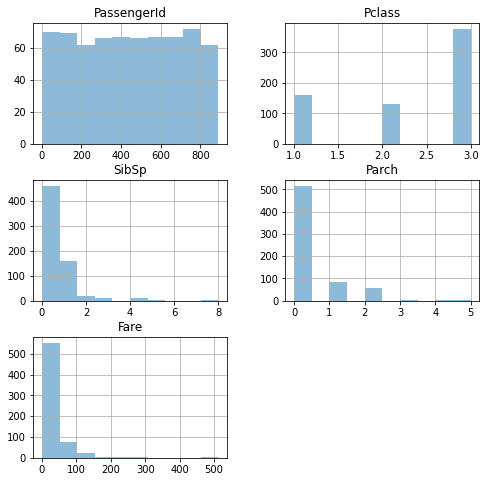

In [21]:
# veamos la distribucion de los datos numericos

X_train.hist(figsize=(8,8),alpha = 0.5)
plt.show()

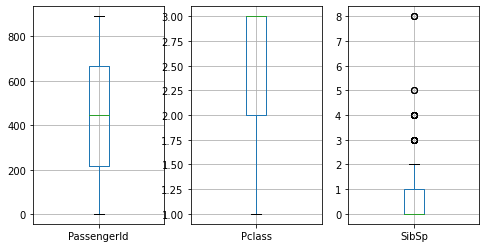

In [22]:
# 2.8 Perform univariate analysis - boxplots
fig, ax = plt.subplots(1,3,figsize =(8,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[: , i].to_frame().boxplot(ax=axs[i])

In [23]:
# se observa en edad una mayor concentracion en edades que van de 20 a 60, en el costo del ticket
# la mayoria cae en valores por debajo de 150, y se observa una mayor cantidad de pasajeros
# en tercera clase.

In [24]:
# tal como vimos en la descripcion de las variables numericas, la edad tiene una mayor dispersion
# alcanzando un valor maximo de 84 años, tambien es interesante observar que el valor minimo se encuentra
# cercano a cero lo que nos permite inferir que podian encontrarse menores de 1 año.

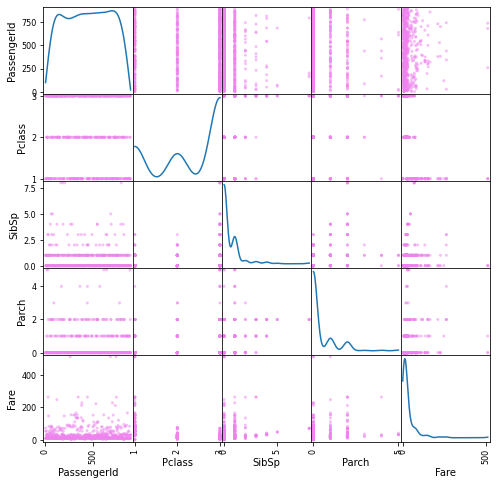

In [25]:
# 2.9 Perform bivariate analysis - numericals

pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

In [26]:
# no ser observan corrlaciones fuertes entre las variables numericas, lo cual es bueno
# porque no interfieren la una en el peso de la otra para la prediccion

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


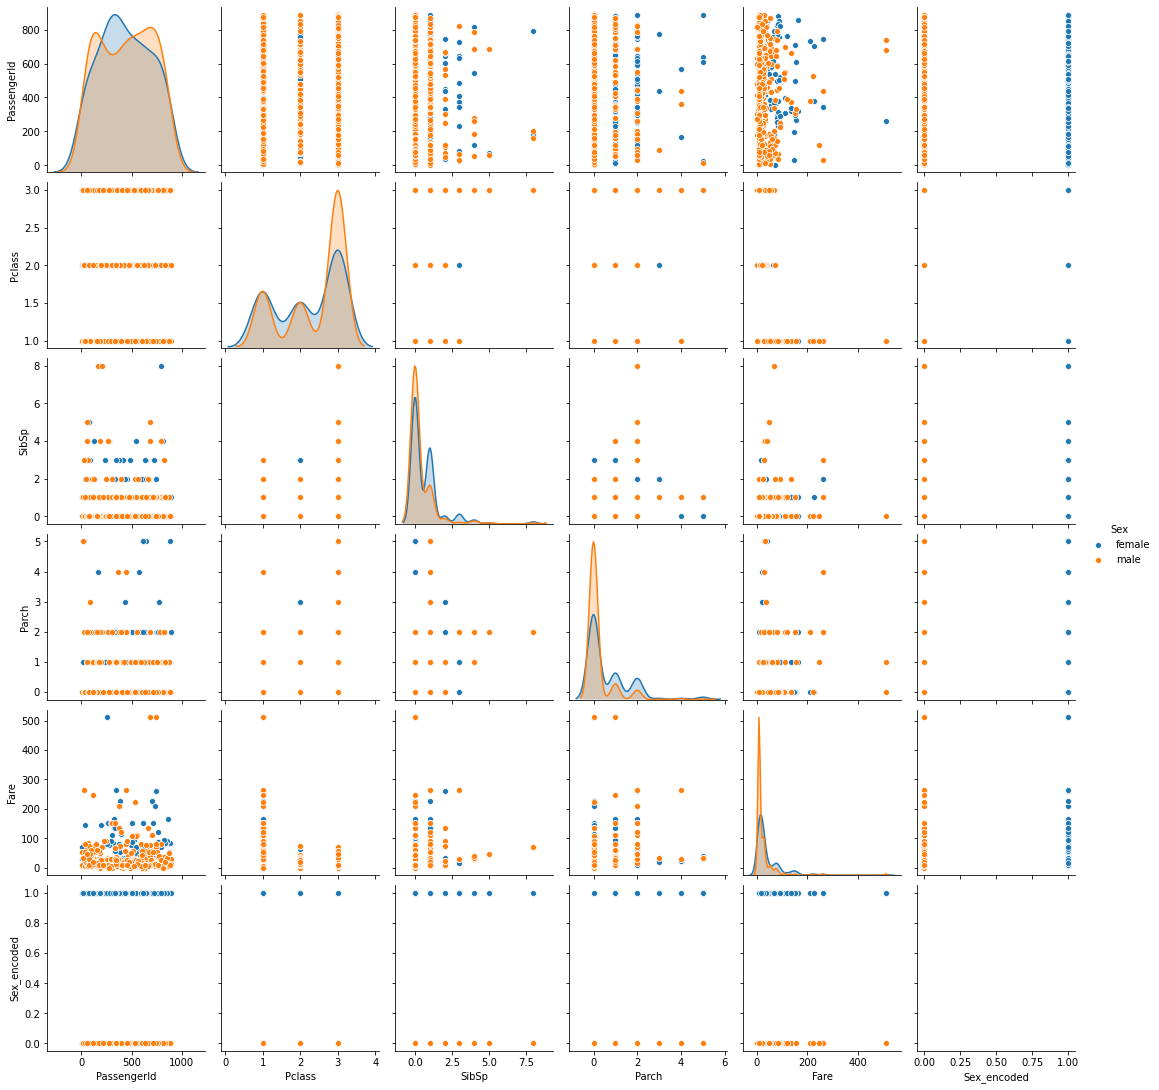

In [27]:
# 2.10 Perform bivariate analysis per category

sns.pairplot(data = X_train, hue='Sex')
plt.show()

In [28]:
# No se observa mayor varianza en los datos ni sesgo a partir de la edad, veamos 
# con la variable Clase

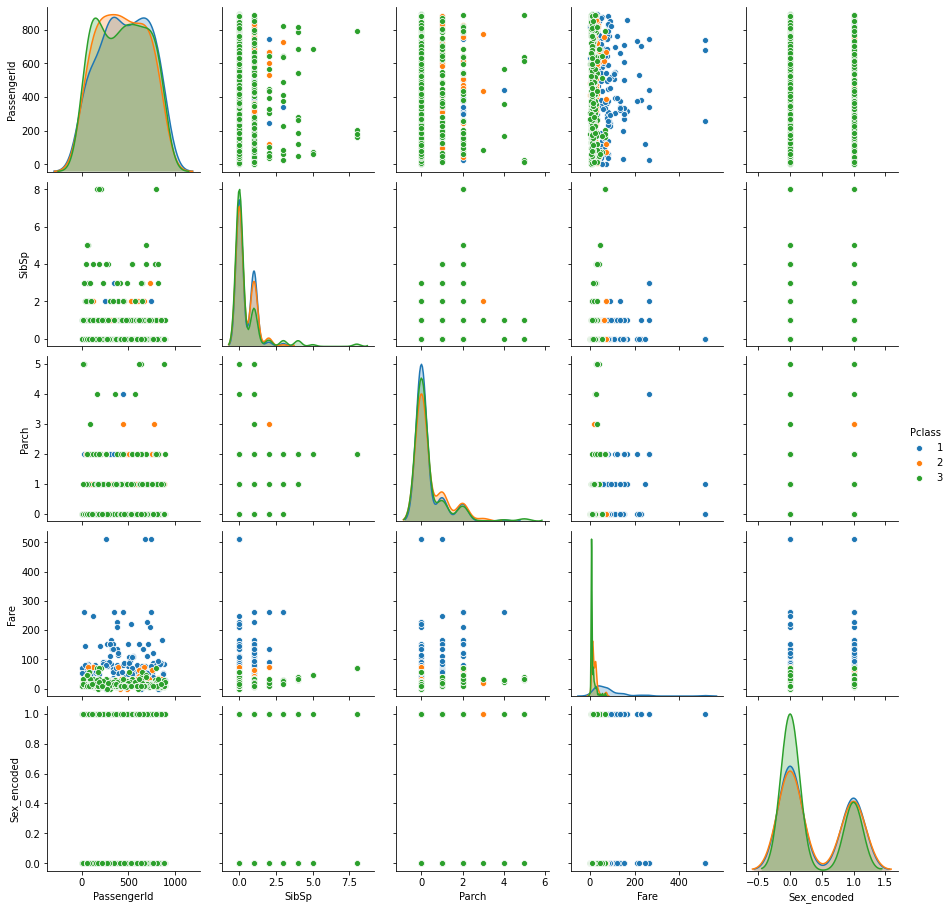

In [29]:
# observo la varianza y el sesgo por clase
sns.pairplot(data = X_train, hue='Pclass')
plt.show()

In [30]:
# Dos variables me llaman la atencion y es la relacion entre la edad y el valor del ticket
# lo cual tiene logica, pero tambien expone que las edades mas jovenes son los
# que se ubican en la tercera clase en mayor proporcion, 

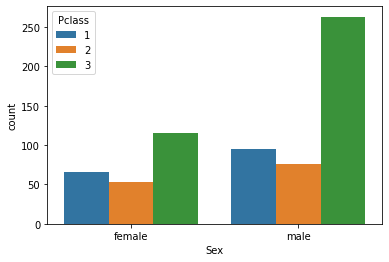

In [31]:
# Veamos como se distribuye el genero y la clase
sns.countplot(data=X_train, x='Sex', hue= 'Pclass')
plt.show()


In [32]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial

X_train.corr().style.background_gradient(cmap='Blues') # si la correlacion es mayor a 75% debe llamarnos la atencion

,PassengerId,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.036429,-0.074942,0.005619,0.006420
Pclass,-0.036429,1.000000,0.062404,0.027457,-0.549617
SibSp,-0.074942,0.062404,1.000000,0.401984,0.149981
Parch,0.005619,0.027457,0.401984,1.000000,0.191374
Fare,0.006420,-0.549617,0.149981,0.191374,1.000000


In [33]:
# la correlacion mas elevada la encontramos en el costo del ticket y la clase, 
# por lo que no se observan riesgos de multicolinealidad a primera vista

In [34]:
df_train.corr()

,PassengerId,Pclass,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.036429,-0.074942,0.005619,0.006420,0.004371
Pclass,-0.036429,1.000000,0.062404,0.027457,-0.549617,-0.325838
SibSp,-0.074942,0.062404,1.000000,0.401984,0.149981,-0.022909
Parch,0.005619,0.027457,0.401984,1.000000,0.191374,0.069480
Fare,0.006420,-0.549617,0.149981,0.191374,1.000000,0.244508
Survived,0.004371,-0.325838,-0.022909,0.069480,0.244508,1.000000


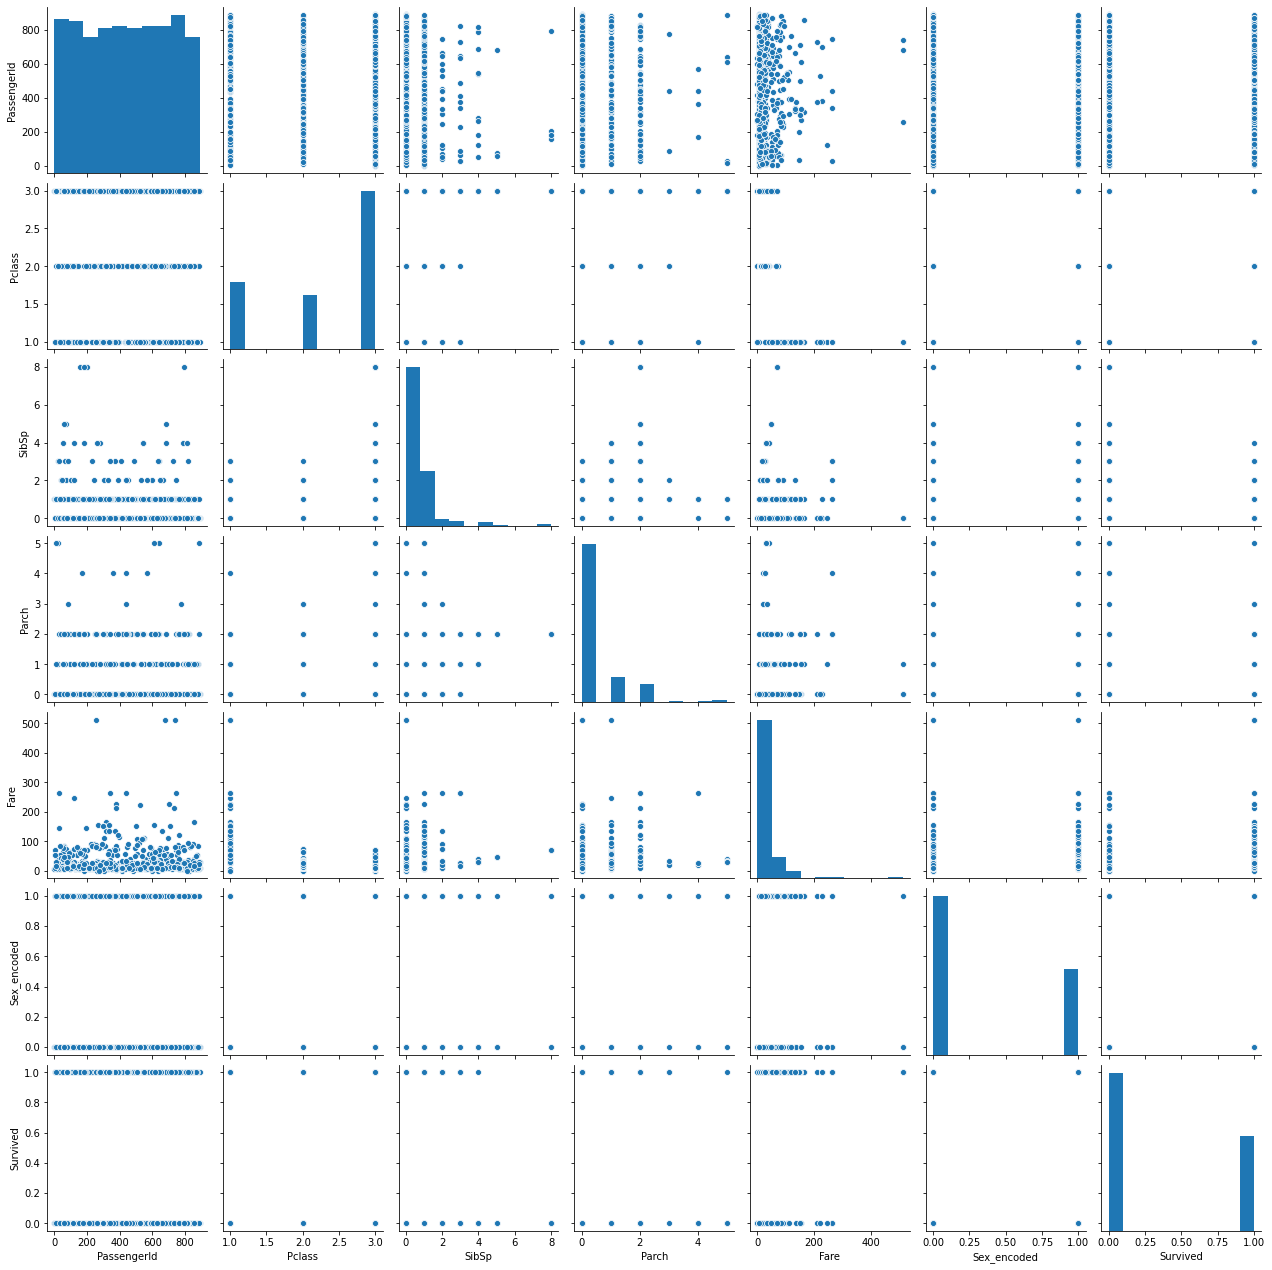

In [35]:
sns.pairplot(data=df_train)
plt.show()

In [36]:
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [37]:
#Paso 3:

#Construya un primer modelo predictivo usando Random Forest. Elija una métrica de evaluación y luego optimice los hiperparámetros de su modelo.

# 3.1 Create your pipeline processing
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/

cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns

# hacemos dos transformadores, el Onehotencoder transforma las categoricas a numericas 0 y 1

cat_transformer_d = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', sparse=False))])
cat_transformer_nd = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
num_transformer = Pipeline(steps=[('scaler',  MinMaxScaler())])
preprocessor_d = ColumnTransformer(transformers=[('num',num_transformer, num_cols),('cat',cat_transformer_d, cat_cols)])
preprocessor_nd = ColumnTransformer(transformers=[('num',num_transformer, num_cols),('cat',cat_transformer_nd, cat_cols)])
encode_data_d = Pipeline(steps=[('preprocessor', preprocessor_d)])
encode_data_nd = Pipeline(steps=[('preprocessor', preprocessor_nd)])


In [38]:
X_train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Sex_encoded    0
dtype: int64

In [39]:
# Entreno al modelo para correr el Randon Forest
# 3.4 Perform model fit - C

rf_reg = Pipeline(steps=[('preprocessor', preprocessor_nd), ('regressor', RandomForestRegressor())])
rf_reg.fit(X_train,y_train)
print(f'R2 score: {rf_reg.score(X_train,y_train)}')

R2 score: 0.902752623923445


In [40]:
# Aca vemos que nuestro modelo segun el score es bueno en un 90% de las veces que predice
# veamos que tan cierto es esto

In [41]:
# Otra forma de hacerlo seria

In [42]:
X = df.drop(['Survived','Cabin', 'Name', 'Ticket', 'Age', 'Embarked', 'Sex'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=70)

In [43]:
X.corr()

,PassengerId,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.159651,0.216225,1.000000


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
classifier=RandomForestClassifier(random_state=1107)

In [45]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1107)

In [46]:
y_pred=classifier.predict(X_test)

In [47]:
print('acurracy:', metrics.accuracy_score(y_test, y_pred))

acurracy: 0.7937219730941704


In [48]:
# la precision bajo al 79%

In [49]:
# Veamos una ultima manera

model = RandomForestClassifier(max_depth=3)
model.fit(X,y)

RandomForestClassifier(max_depth=3)

In [50]:
a = X.sample()
a

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_encoded
565,566,3,2,0,24.15,0


In [51]:
# tenemos al pasajero Id 505, es hombre, de primera clase, 

In [52]:
y_pred_1 = model.predict(X_train)

In [53]:
y_pred_1.shape

(668,)

In [54]:
df_train['pred'] = y_pred_1

In [55]:
df_train.sample(10)[['Survived','pred']]

,Survived,pred
541,0,0
854,0,1
276,0,0
156,1,0
462,0,0
417,1,1
181,0,0
506,1,1
479,1,1
37,0,0


In [56]:
(df_train['Survived'] == df_train['pred']).sum()

537

In [57]:
# El porcentaje de acierto cambio a 80% :)

(df_train['Survived'] == df_train['pred']).sum()/668

0.8038922155688623

In [59]:
# Paso 5
# Salvo el modelo
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf_reg, open(filename, 'wb'))